In [1]:
import numpy  as np
import pandas as pd
import geopandas as gpd
import json

# data  refining 
import re
import nltk.corpus
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing  import normalize

from sklearn import cluster


import matplotlib.pyplot  as plt
import matplotlib.cm as cm
import seaborn  as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

In [2]:
# utf  encoding help it to convert it into  binary
df =pd.read_csv(r"C:\Users\anshr\Downloads\anthems.csv")

In [3]:
df.head(90)

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
85,Vanuatu,VU,VUT,Oceania,"We are, we are, we are happy to proclaim We ar..."
86,Samoa,WS,WSM,Oceania,"Samoa, arise and raise your flag, your crown! ..."
87,Kiribati,KI,KIR,Oceania,"Stand up, People of Kiribati! Sing with jubila..."
88,Federated States of Micronesia,FM,FSM,Oceania,"This here we are pledging, With heart and with..."


In [4]:
#  to lower the columns // 
df.columns=map(str.lower,df.columns)

In [5]:
df.columns

Index(['country', 'alpha-2', 'alpha-3', 'continent', 'anthem'], dtype='object')

In [6]:
corpus =df['anthem'].tolist()

In [7]:
corpus

['Around our flag we stand united, With one wish and one goal, A sacred oath we bestow upon it Proclaiming loyalty for our salvation. From war abstains only he, Who a traitor is born, He who is a true man is not frightened, But dies a warrior to the cause. With weapons in our hands a-brandished, We will defend our fatherland, Our sacred rights weÃ¢â‚¬â„¢ll not relinquish, The foe has no place in our land. For God himself proclaimed The nations of the earth shall wane, And yet will live, will thrive Albania. For you, for you we fight. O Flag, flag, you sacred symbol Upon you we now swear For Albania, our dear fatherland For honour and your glory. Brave man is named and honoured The one who sacrificed himself for the fatherland Forever he will be remembered On earth and under as a saint!',
 'Our Fatherland, free, independent, That has for centuries lived, Is now summoning its sons To the free, independent Armenia. Here is a flag for you, my brother, That I have sewn by hand Over the slee

In [8]:
def  removeWords(low,rlow):
    return [token for token in low if  token not in rlow]


def applyStemming(low, stemmer):
    return [stemmer.stem(token) for token in low]



def twoLetters(low):
    twoLetterWord = []
    for token in low:
        if len(token) <= 2:
            twoLetterWord.append(token)
    return twoLetterWord
    


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    countries_list = [line.rstrip('\n') for line in open(r"C:\Users\anshr\Downloads\countries.txt")] # Load .txt file line by line
    nationalities_list = [line.rstrip('\n') for line in open(r"C:\Users\anshr\Downloads\nationalities.txt")] # Load .txt file line by line
    other_words = [line.rstrip('\n') for line in open(r"C:\Users\anshr\Downloads\stop_words.txt")] # Load .txt file line by line
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only word.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        low = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(low)

        low = removeWords(low, stopwords)
        low = removeWords(low, twoLetterWord)
        low = removeWords(low, countries_list)
        low = removeWords(low, nationalities_list)
        low = removeWords(low, other_words)
        
        low = applyStemming(low, param_stemmer)
        low = removeWords(low, other_words)

        corpus[index]   = " ".join(low)
        corpus[index] = unidecode(corpus[index])

    return corpus

In [11]:
processCorpus(corpus,'english')

['flag stand unit goal sacr oath bestow proclaim loyalti salvat war abstain traitor born true man frighten die warrior weapon hand a-brandish defend fatherland sacr weaC/a,!a C/ll relinquish foe place land god proclaim nation earth wane live thrive fight flag flag sacr symbol swear dear fatherland honour glori brave man honour sacrif fatherland forev rememb earth saint',
 'fatherland free independ centuri live summon son free independ flag brother sewn hand sleepless night bath tear tricolor valuabl symbol shine enemi glorious forev death man die bless die freedom nation',
 'land mountain land river land field land cathedr land hammer promis futur home great daughter son peopl high gift beauti art much-prais strong feud fierc hard-fought liest middl contin strong heart earli day ancestor hast born burden high mission much-tri brave age stride free faith assidu full hope unifi jolli choir pledg allegi fatherland much-belov',
 'glorious fatherland valor father stand readi die stand readi

In [12]:
corpus[10]

'home home water roar meadow pinewood rustl rock orchard glorious spring blossom paradis earth beauti land land home land home'

In [13]:
corpus

['flag stand unit goal sacr oath bestow proclaim loyalti salvat war abstain traitor born true man frighten die warrior weapon hand a-brandish defend fatherland sacr weaC/a,!a C/ll relinquish foe place land god proclaim nation earth wane live thrive fight flag flag sacr symbol swear dear fatherland honour glori brave man honour sacrif fatherland forev rememb earth saint',
 'fatherland free independ centuri live summon son free independ flag brother sewn hand sleepless night bath tear tricolor valuabl symbol shine enemi glorious forev death man die bless die freedom nation',
 'land mountain land river land field land cathedr land hammer promis futur home great daughter son peopl high gift beauti art much-prais strong feud fierc hard-fought liest middl contin strong heart earli day ancestor hast born burden high mission much-tri brave age stride free faith assidu full hope unifi jolli choir pledg allegi fatherland much-belov',
 'glorious fatherland valor father stand readi die stand readi

In [14]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [15]:
cv =TfidfVectorizer()
X=cv.fit_transform(corpus).toarray()
X.shape

(190, 2547)

In [16]:
processed_data=pd.DataFrame(X,columns=cv.get_feature_names())

processed_data

,4th,abandon,abanyarwanda,abid,ablaz,abound,absolut,abstain,abund,abyss,...,yonder,yore,young,youth,zambezi,zeal,zealand,zealous,zenith,zion
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.173231,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.095461,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.133638,0.00000,0.0,0.0,0.0,0.0,0.0
186,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
187,0.0,0.102768,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
188,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [20]:
def run_KMeans(max_k, data):
    max_k += 1
    wcss=[]
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
       
        
        
    return kmeans_results

In [18]:
kmeans_result

NameError: name 'kmeans_result' is not defined

In [19]:
k = 8
kmeans_results = run_KMeans(k, processed_data)
kmeans_results

C:\Users\anshr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anshr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows wi

{2: KMeans(algorithm='full', n_clusters=2, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, random_state=1),
 8: KMeans(algorithm='full', random_state=1)}

In [ ]:
wcss

In [21]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = cv.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

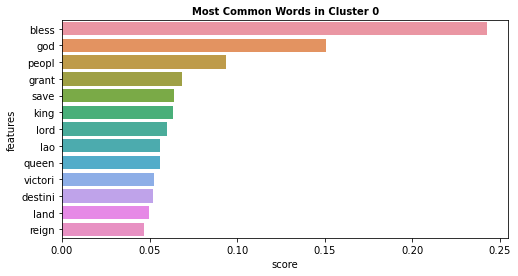

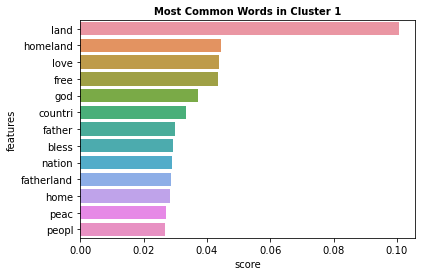

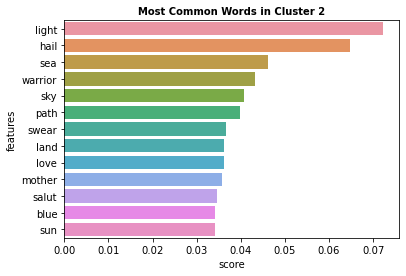

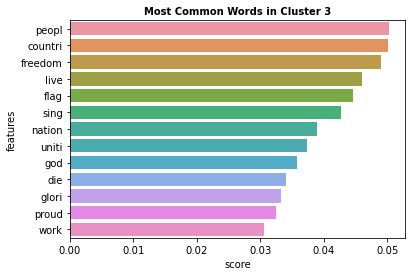

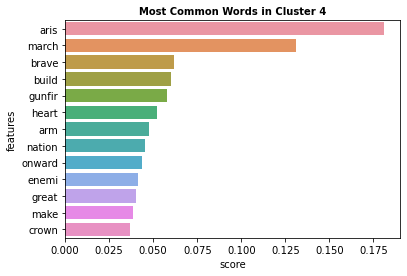

In [22]:
best_result = 5
kmeans = kmeans_results.get(best_result)

processed_data_array =processed_data.to_numpy()
prediction = kmeans.predict(processed_data)
n_feats = 20
dfs = get_top_features_cluster(processed_data_array, prediction, n_feats)
plotWords(dfs, 13)


In [23]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

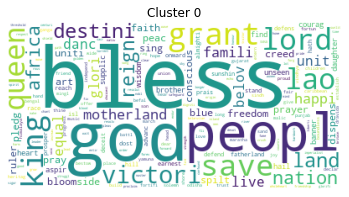

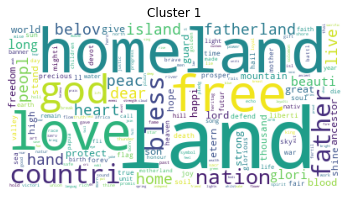

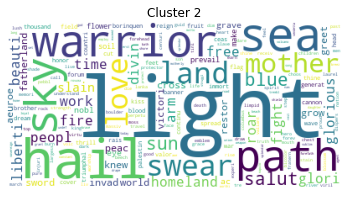

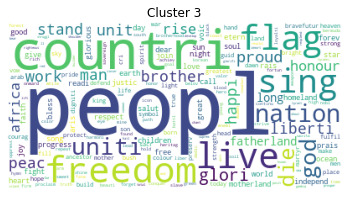

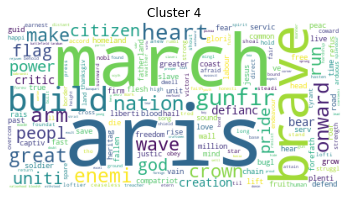

In [24]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = processed_data.columns
generateWordClouds(centroids)

In [25]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,country,alpha-2,alpha-3,continent,anthem,label
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",3
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",3
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",1
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",3
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",0


In [26]:
import json
import geopandas as gpd

# Loading countries polygons
geo_path = r"C:\Users\anshr\Downloads\world-countries.json"
country_geo = json.load(open(geo_path))
gpf = gpd.read_file(geo_path)

# Merging on the alpha-3 country codes
merge = pd.merge(gpf, df, left_on='id', right_on='alpha-3')
data_to_plot = merge[["id", "name", "label", "geometry"]]

data_to_plot.head(3)

,id,name,label,geometry
0,AFG,Afghanistan,1,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,3,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,3,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."


In [27]:
import branca.colormap as cm

# Creating a discrete color map
values = data_to_plot[['label']].to_numpy()
color_step = cm.StepColormap(['r', 'y','g','b', 'm'], vmin=values.min(), vmax=values.max(), caption='step')

color_step

In [28]:
import folium
from branca.element import Figure

def make_geojson_choropleth(display, data, colors):
    group_dict = data.set_index('id')['label'] # Dictionary of Countries IDs and Clusters
    tooltip = folium.features.GeoJsonTooltip(["name", "label"], aliases=display, labels=True)
    return folium.GeoJson(data[["id", "name","label","geometry"]],
                          style_function = lambda feature: {
                               'fillColor': colors(group_dict[feature['properties']['id']]),
                               #'fillColor': test(feature),
                               'color':'black',
                               'weight':0.5
                               },
                          highlight_function = lambda x: {'weight':2, 'color':'black'},
                          smooth_factor=2.0,
                          tooltip = tooltip)

# Makes map appear inline on notebook
def display(m, width, height):
    fig = Figure(width=width, height=height)
    fig.add_child(m)
    #return fig

In [29]:
# Initializing our Folium Map
m = folium.Map(location=[43.5775, -10.106111], zoom_start=2.3, tiles='cartodbpositron')

# Making a choropleth map with geojson
geojson_choropleth = make_geojson_choropleth(["Country:", "Group:"], data_to_plot, color_step)
geojson_choropleth.add_to(m)

width, height = 1300, 675
display(m, width, height)
m

In [40]:
import os
import time
from selenium import webdriver

In [41]:
delay=6

In [45]:
import os
import time
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(executable_path=r'C:\Users\anshr\Downloads\geckodriver-v0.32.0-win32\geckodriver.exe', options=options)
delay=10
 
#Save the map as an HTML file
fn='Anthem.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

In [46]:

#..that displays the map...
driver.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
#Grab the screenshot
driver.save_screenshot('map.png')
#Close the browser
driver.quit()